In [62]:
using Plots
using MAT
gr()

Plots.GRBackend()

# Morlet wavelet

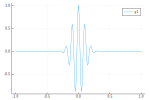

In [61]:
function morlet(F::T, fs) where {T<:Number}
    s = 6 / (2 * pi * F)
    wtime = linspace(-1,1,2*fs)
    wavelet = exp.(2*pi*wtime*F*1im) .* exp.(- wtime.^2/(2*s^2))  # morlet wavelet
    return wavelet
end
plot(linspace(-1,1,2*2000), real.(morlet(10, 2000)))

In [ ]:
function wavelet(data, fs, frange; wavelet=:morlet, baseroi=nothing, reflection=false)
    conv = size(data,1) + 2*fs
    fft_data = fft(data, conv)
end

In [64]:
a = matread("/Users/yizhan/Desktop/Observer/Data/Chen\ Zhou/EEG/Compact/180831-3-5.mat")

Dict{String,Any} with 4 entries:
  "cue_onset" => [3.0 8.0 … 93.0 98.0]
  "markers"   => Dict{String,Any}(Pair{String,Any}("entrain", Array{Float64}(0,…
  "channels"  => [-18.0624 -19.6243 … 16.3126 19.8267; 11.2321 8.01105 … -13.28…
  "times"     => [0.0 0.0005 … 104.999 104.999]

In [73]:
fft(a["channels"][1,:])

210000-element Array{Complex{Float64},1}:
  1.19554e6+0.0im      
  7.13941e5+471964.0im 
 -5.10851e5-1.29162e5im
 -1.21586e6-2.50636e5im
 -2.89116e5-1.02884e5im
 -2.62794e5+5.55117e5im
 -9.38444e5-16184.9im  
   205319.0-1.05044e6im
  1.44595e5+3.90813e5im
   -12443.8-183428.0im 
  -193631.0-1.60096e5im
   360131.0-95353.2im  
 -1.41158e5+62710.7im  
           ⋮           
 -1.41158e5-62710.7im  
   360131.0+95353.2im  
  -193631.0+1.60096e5im
   -12443.8+183428.0im 
  1.44595e5-3.90813e5im
   205319.0+1.05044e6im
 -9.38444e5+16184.9im  
 -2.62794e5-5.55117e5im
 -2.89116e5+1.02884e5im
 -1.21586e6+2.50636e5im
 -5.10851e5+1.29162e5im
  7.13941e5-471964.0im 

In [72]:
fft()

search: fft fft! FFTW fftshift rfft ifft bfft ifft! bfft! ifftshift irfft brfft



```
fft(A [, dims])
```

Performs a multidimensional FFT of the array `A`. The optional `dims` argument specifies an iterable subset of dimensions (e.g. an integer, range, tuple, or array) to transform along. Most efficient if the size of `A` along the transformed dimensions is a product of small primes; see `nextprod()`. See also `plan_fft()` for even greater efficiency.

A one-dimensional FFT computes the one-dimensional discrete Fourier transform (DFT) as defined by

$$
\operatorname{DFT}(A)[k] =
  \sum_{n=1}^{\operatorname{length}(A)}
  \exp\left(-i\frac{2\pi
  (n-1)(k-1)}{\operatorname{length}(A)} \right) A[n].
$$

A multidimensional FFT simply performs this operation along each transformed dimension of `A`.

!!! note
      * Julia starts FFTW up with 1 thread by default. Higher performance is usually possible by increasing number of threads. Use `FFTW.set_num_threads(Sys.CPU_CORES)` to use as many threads as cores on your system.
      * This performs a multidimensional FFT by default. FFT libraries in other languages such as Python and Octave perform a one-dimensional FFT along the first non-singleton dimension of the array. This is worth noting while performing comparisons. For more details, refer to the [Noteworthy Differences from other Languages](@ref) section of the manual.

